In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,classification_report
import xgboost as xgb
import lightgbm as lgb
from sklearn.naive_bayes import MultinomialNB

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import tensorflow as tf

In [304]:
df=pd.read_csv('train.csv')

In [305]:
df.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [306]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [307]:
X_train,X_test,y_train,y_test,X,y,cm=preparedata(df)

D:\anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


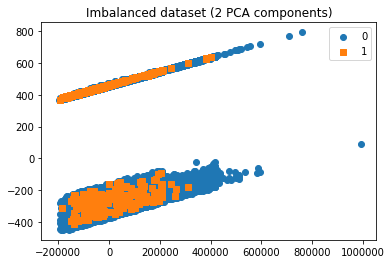

In [308]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

Removed indexes: [107365  92689 111545 ... 115625 115773 115906]


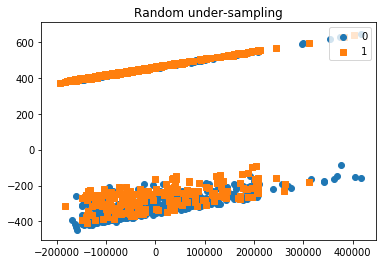

In [309]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)

print('Removed indexes:', id_rus)

plot_2d_space(X_rus, y_rus, 'Random under-sampling')

114786 new random picked points


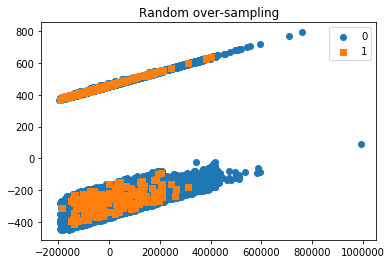

In [310]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

Removed indexes: [     0      1      2 ... 116055 116056 116057]


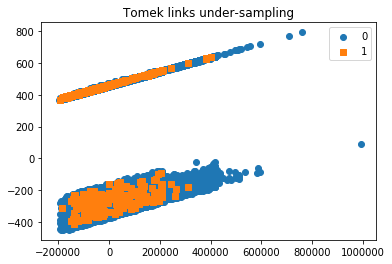

In [311]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

print('Removed indexes:', id_tl)

plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

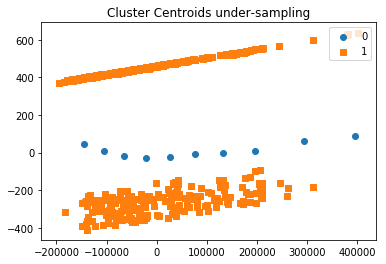

In [312]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={0: 10})
X_cc, y_cc = cc.fit_sample(X, y)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

In [313]:
X_cc.shape

(646, 2)

In [314]:
y_cc.shape

(646,)

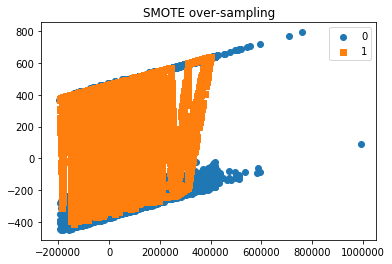

In [315]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

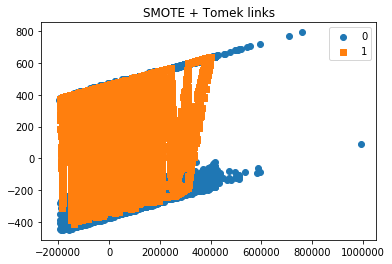

In [316]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

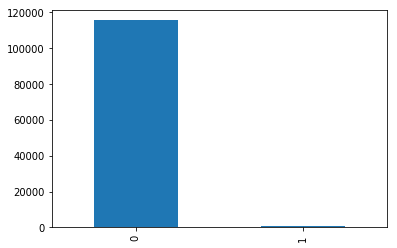

In [317]:
# check records for each target 
df.m13.value_counts().plot.bar()

## Data ib Imbalanced !!!

#### As we can see data is imbalanced . So first step is to balance data using sampling . Imbalance data could make model ignore minority class .

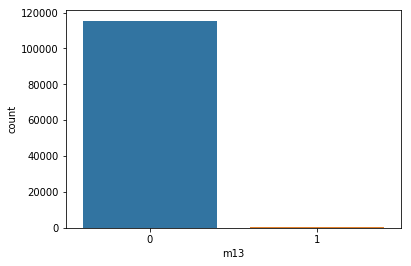

In [318]:
sns.countplot(x='m13',data=df)

In [319]:
X_train,X_test,y_train,y_test,X,y,cm=preparedata(df)
lr=lrmodel(X_train,X_test,y_train,y_test)


D:\anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


 Accuracy Score : 0.9937388706990637
F1 Score : 0.0
Classification Report :                precision    recall  f1-score   support

           0       0.99      1.00      1.00     34618
           1       0.00      0.00      0.00       200

    accuracy                           0.99     34818
   macro avg       0.50      0.50      0.50     34818
weighted avg       0.99      0.99      0.99     34818



In [297]:
sv=LinearSVC()
sv.fit(X_train,y_train)
y_pred=sv.predict(X_test)
print(" Accuracy Score :",accuracy_score(y_pred,y_test))
print("F1 Score :",f1_score(y_pred,y_test))
print("Classification Report : ",classification_report(y_test,y_pred))
   


D:\anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


 Accuracy Score : 0.9941696823482107
F1 Score : 0.0
Classification Report :                precision    recall  f1-score   support

           0       0.99      1.00      1.00     34615
           1       0.00      0.00      0.00       203

    accuracy                           0.99     34818
   macro avg       0.50      0.50      0.50     34818
weighted avg       0.99      0.99      0.99     34818



D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [327]:
et=ExtraTreesClassifier()
et.fit(X_train,y_train)
y_pred=et.predict(X_test)
print(" Accuracy Score :",accuracy_score(y_pred,y_test))
print("F1 Score :",f1_score(y_pred,y_test))
print("Classification Report : ",classification_report(y_test,y_pred))

D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 Accuracy Score : 0.9956344419553105
F1 Score : 0.44927536231884063
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     34618
           1       0.82      0.31      0.45       200

    accuracy                           1.00     34818
   macro avg       0.91      0.65      0.72     34818
weighted avg       0.99      1.00      0.99     34818



In [298]:
kn=KNeighborsClassifier(n_neighbors=5)

kn.fit(X_train,y_train)
y_pred=kn.predict(X_test)
print(" Accuracy Score :",accuracy_score(y_pred,y_test))
print("F1 Score :",f1_score(y_pred,y_test))
print("Classification Report : ",classification_report(y_test,y_pred))
   


 Accuracy Score : 0.9940835200183813
F1 Score : 0.0
Classification Report :                precision    recall  f1-score   support

           0       0.99      1.00      1.00     34615
           1       0.00      0.00      0.00       203

    accuracy                           0.99     34818
   macro avg       0.50      0.50      0.50     34818
weighted avg       0.99      0.99      0.99     34818



In [299]:
rt=randomforest_model(X_train,X_test,y_train,y_test)

D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 Accuracy Score : 0.9953472341892124
F1 Score : 0.40875912408759124
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     34615
           1       0.79      0.28      0.41       203

    accuracy                           1.00     34818
   macro avg       0.89      0.64      0.70     34818
weighted avg       0.99      1.00      0.99     34818



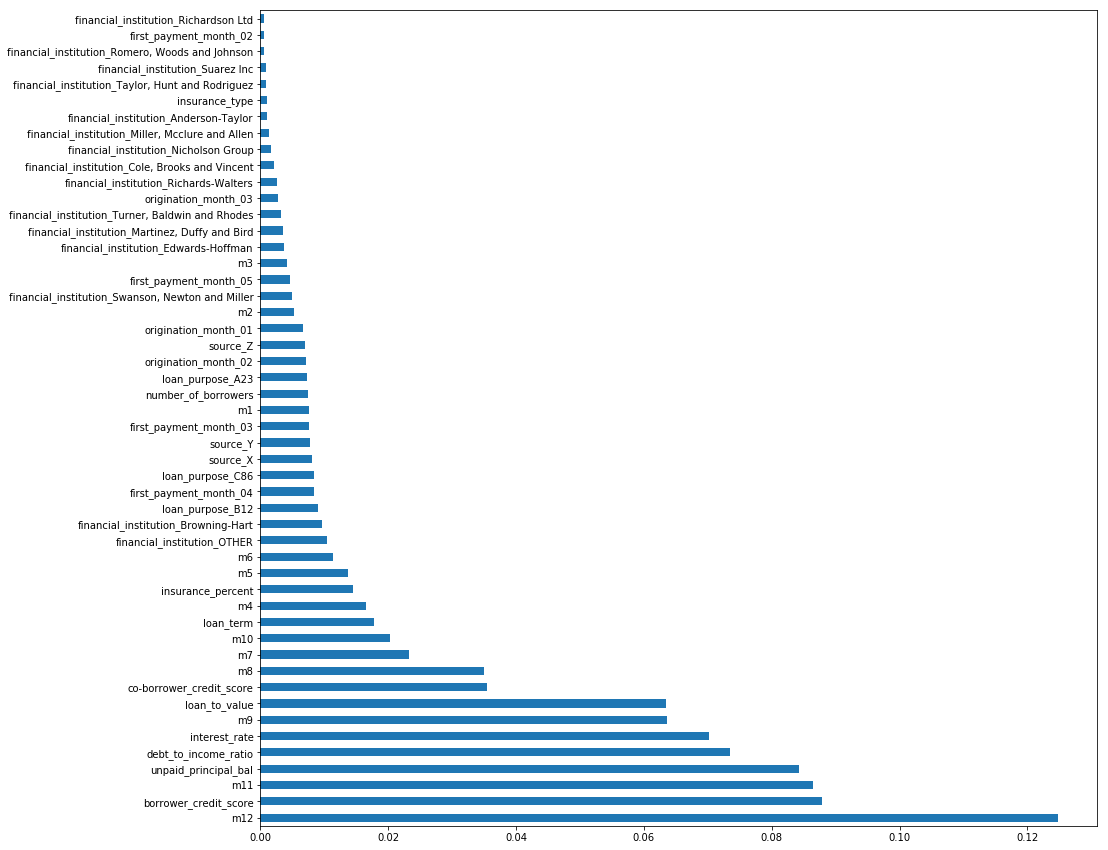

In [328]:

plt.figure(figsize=(15,15))
feat_importances = pd.Series(et.feature_importances_, index=cm)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

#### Model ignoring minority class . None of records of target class '1' correctly identified .

In [329]:
df=pd.read_csv('train.csv')

In [330]:
# count for each class records

df_class_0=df[df.m13==0]
df_class_1=df[df.m13==1]




In [331]:
# No of records for target class 0
df_class_0.shape

(115422, 29)

In [332]:
# No of records for target class 1
df_class_1.shape

(636, 29)

In [333]:
from sklearn.utils import resample

In [334]:
# Upsample minority class
df_class_1_upsampled = resample(df_class_1, 
                                 replace=True,     # sample with replacement
                                 n_samples=115422,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_class_0, df_class_1_upsampled])
 
# Display new class counts
df_upsampled.m13.value_counts()

1    115422
0    115422
Name: m13, dtype: int64

In [335]:
X_train,X_test,y_train,y_test,X,y,cm=preparedata(df_upsampled)

D:\anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [336]:
X_train.shape

(161590, 54)

In [337]:
sv=LinearSVC()
sv.fit(X_train,y_train)
y_pred=sv.predict(X_test)
print(" Accuracy Score :",accuracy_score(y_pred,y_test))
print("F1 Score :",f1_score(y_pred,y_test))
print("Classification Report : ",classification_report(y_test,y_pred))
   

D:\anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


 Accuracy Score : 0.6285990700898143
F1 Score : 0.48849557522123893
Classification Report :                precision    recall  f1-score   support

           0       0.58      0.90      0.71     34685
           1       0.78      0.36      0.49     34569

    accuracy                           0.63     69254
   macro avg       0.68      0.63      0.60     69254
weighted avg       0.68      0.63      0.60     69254



In [338]:
kn=KNeighborsClassifier(n_neighbors=5)

kn.fit(X_train,y_train)
y_pred=kn.predict(X_test)
print(" Accuracy Score :",accuracy_score(y_pred,y_test))
print("F1 Score :",f1_score(y_pred,y_test))
print("Classification Report : ",classification_report(y_test,y_pred))
   


 Accuracy Score : 0.990152193375112
F1 Score : 0.990232025207677
Classification Report :                precision    recall  f1-score   support

           0       1.00      0.98      0.99     34685
           1       0.98      1.00      0.99     34569

    accuracy                           0.99     69254
   macro avg       0.99      0.99      0.99     69254
weighted avg       0.99      0.99      0.99     69254



In [339]:
et=ExtraTreesClassifier()
et.fit(X_train,y_train)
y_pred=et.predict(X_test)
print(" Accuracy Score :",accuracy_score(y_pred,y_test))
print("F1 Score :",f1_score(y_pred,y_test))
print("Classification Report : ",classification_report(y_test,y_pred))

D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 Accuracy Score : 0.9996245704219251
F1 Score : 0.9996240818923139
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     34685
           1       1.00      1.00      1.00     34569

    accuracy                           1.00     69254
   macro avg       1.00      1.00      1.00     69254
weighted avg       1.00      1.00      1.00     69254



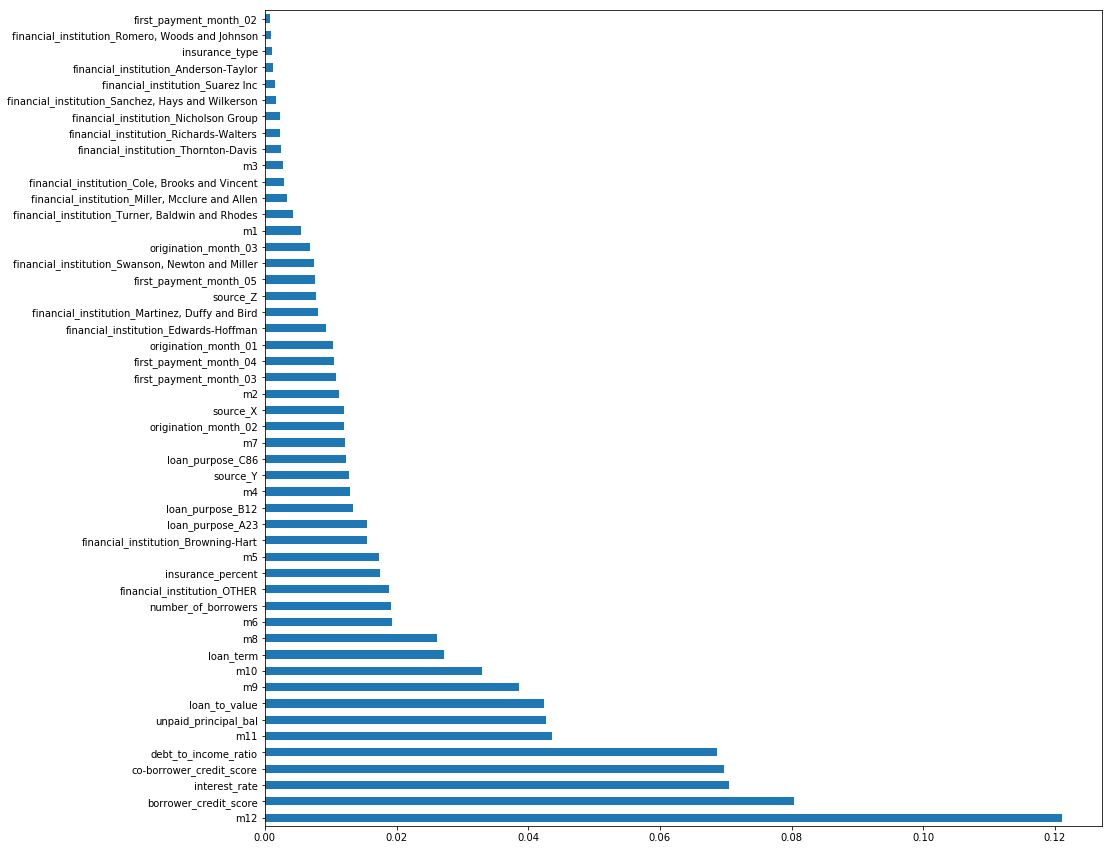

In [340]:

plt.figure(figsize=(15,15))
feat_importances = pd.Series(et.feature_importances_, index=cm)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

In [341]:

lr=lrmodel(X_train,X_test,y_train,y_test)


D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


 Accuracy Score : 0.7713922661506917
F1 Score : 0.7614081620350835
Classification Report :                precision    recall  f1-score   support

           0       0.75      0.81      0.78     34685
           1       0.79      0.73      0.76     34569

    accuracy                           0.77     69254
   macro avg       0.77      0.77      0.77     69254
weighted avg       0.77      0.77      0.77     69254



In [342]:
rt=randomforest_model(X_train,X_test,y_train,y_test)

D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 Accuracy Score : 0.9993357784387905
F1 Score : 0.9993351063829787
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     34685
           1       1.00      1.00      1.00     34569

    accuracy                           1.00     69254
   macro avg       1.00      1.00      1.00     69254
weighted avg       1.00      1.00      1.00     69254



In [343]:
xg=xgbmodel(X_train,X_test,y_train,y_test)

 Accuracy Score : 0.8456262454154273
F1 Score : 0.8335072337377166
Classification Report :                precision    recall  f1-score   support

           0       0.80      0.92      0.86     34685
           1       0.90      0.77      0.83     34569

    accuracy                           0.85     69254
   macro avg       0.85      0.85      0.84     69254
weighted avg       0.85      0.85      0.84     69254



In [344]:
mnb=naive_bays_model(X_train,X_test,y_train,y_test)

 Accuracy Score : 0.6390966586767551
F1 Score : 0.654588170259812
Classification Report :                precision    recall  f1-score   support

           0       0.65      0.59      0.62     34685
           1       0.63      0.69      0.65     34569

    accuracy                           0.64     69254
   macro avg       0.64      0.64      0.64     69254
weighted avg       0.64      0.64      0.64     69254



In [345]:
lg=lgbmodel(X_train,X_test,y_train,y_test)

 Accuracy Score : 0.9802899471510671
F1 Score : 0.9803729851754928
Classification Report :                precision    recall  f1-score   support

           0       0.99      0.97      0.98     34685
           1       0.97      0.99      0.98     34569

    accuracy                           0.98     69254
   macro avg       0.98      0.98      0.98     69254
weighted avg       0.98      0.98      0.98     69254



In [346]:
from imblearn.over_sampling import SMOTE

In [347]:
df=pd.read_csv('train.csv')

df.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [348]:
X_train,X_test,y_train,y_test,X,y,cm=preparedata(df)

D:\anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [349]:

smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [350]:
'''

sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)
pca = PCA(.95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
'''

'\n\nsc=StandardScaler()\nsc.fit(X_train)\nX_train=sc.transform(X_train)\nX_test=sc.transform(X_test)\npca = PCA(.95)\npca.fit(X_train)\nX_train = pca.transform(X_train)\nX_test = pca.transform(X_test)\n'

In [351]:
sv=LinearSVC()
sv.fit(X_train,y_train)
y_pred=sv.predict(X_test)
print(" Accuracy Score :",accuracy_score(y_pred,y_test))
print("F1 Score :",f1_score(y_pred,y_test))
print("Classification Report : ",classification_report(y_test,y_pred))
   

 Accuracy Score : 0.675799873628583
F1 Score : 0.022345401004676947
Classification Report :                precision    recall  f1-score   support

           0       1.00      0.68      0.81     34619
           1       0.01      0.65      0.02       199

    accuracy                           0.68     34818
   macro avg       0.50      0.66      0.41     34818
weighted avg       0.99      0.68      0.80     34818



D:\anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [352]:
kn=KNeighborsClassifier(n_neighbors=5)

kn.fit(X_train,y_train)
y_pred=kn.predict(X_test)
print(" Accuracy Score :",accuracy_score(y_pred,y_test))
print("F1 Score :",f1_score(y_pred,y_test))
print("Classification Report : ",classification_report(y_test,y_pred))

 Accuracy Score : 0.9675168016543167
F1 Score : 0.029184549356223173
Classification Report :                precision    recall  f1-score   support

           0       0.99      0.97      0.98     34619
           1       0.02      0.09      0.03       199

    accuracy                           0.97     34818
   macro avg       0.51      0.53      0.51     34818
weighted avg       0.99      0.97      0.98     34818



In [353]:
et=ExtraTreesClassifier()
et.fit(X_train,y_train)
y_pred=et.predict(X_test)
print(" Accuracy Score :",accuracy_score(y_pred,y_test))
print("F1 Score :",f1_score(y_pred,y_test))
print("Classification Report : ",classification_report(y_test,y_pred))

D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 Accuracy Score : 0.995117467976334
F1 Score : 0.4256756756756756
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     34619
           1       0.65      0.32      0.43       199

    accuracy                           1.00     34818
   macro avg       0.82      0.66      0.71     34818
weighted avg       0.99      1.00      0.99     34818



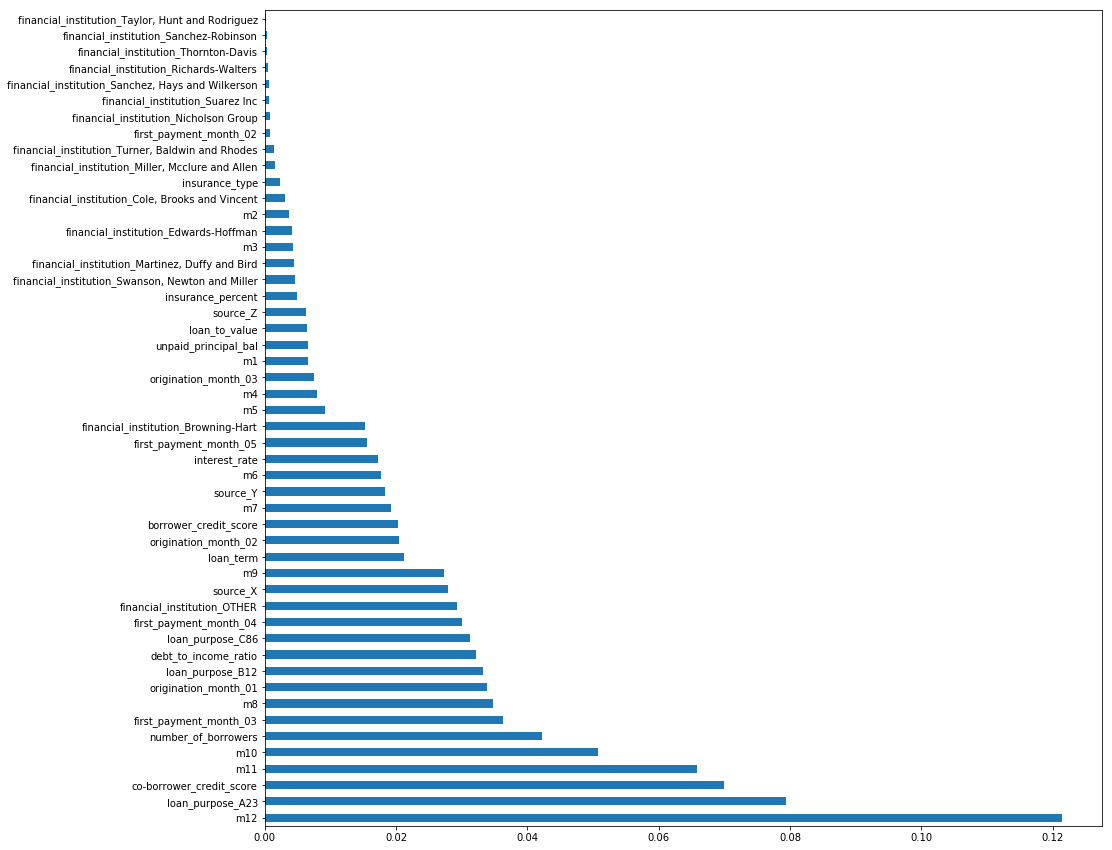

In [354]:

plt.figure(figsize=(15,15))
feat_importances = pd.Series(et.feature_importances_, index=cm)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

In [355]:
lr=lrmodel(X_train,X_test,y_train,y_test)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


 Accuracy Score : 0.9464644723993336
F1 Score : 0.12406015037593984
Classification Report :                precision    recall  f1-score   support

           0       1.00      0.95      0.97     34619
           1       0.07      0.66      0.12       199

    accuracy                           0.95     34818
   macro avg       0.53      0.81      0.55     34818
weighted avg       0.99      0.95      0.97     34818



In [356]:
rt=randomforest_model(X_train,X_test,y_train,y_test)

D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 Accuracy Score : 0.9951461887529439
F1 Score : 0.380952380952381
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     34619
           1       0.70      0.26      0.38       199

    accuracy                           1.00     34818
   macro avg       0.85      0.63      0.69     34818
weighted avg       0.99      1.00      0.99     34818



In [357]:
xg=xgbmodel(X_train,X_test,y_train,y_test)

 Accuracy Score : 0.9950600264231145
F1 Score : 0.4911242603550295
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     34619
           1       0.60      0.42      0.49       199

    accuracy                           1.00     34818
   macro avg       0.80      0.71      0.74     34818
weighted avg       0.99      1.00      0.99     34818



In [358]:
mnb=naive_bays_model(X_train,X_test,y_train,y_test)

 Accuracy Score : 0.5960135562065598
F1 Score : 0.019380925822643613
Classification Report :                precision    recall  f1-score   support

           0       1.00      0.60      0.75     34619
           1       0.01      0.70      0.02       199

    accuracy                           0.60     34818
   macro avg       0.50      0.65      0.38     34818
weighted avg       0.99      0.60      0.74     34818



In [359]:
lg=lgbmodel(X_train,X_test,y_train,y_test)

 Accuracy Score : 0.9950025848698949
F1 Score : 0.4350649350649351
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     34619
           1       0.61      0.34      0.44       199

    accuracy                           1.00     34818
   macro avg       0.81      0.67      0.72     34818
weighted avg       0.99      1.00      0.99     34818



In [360]:
X_train.shape

(161606, 54)

In [361]:
df.shape

(116058, 31)

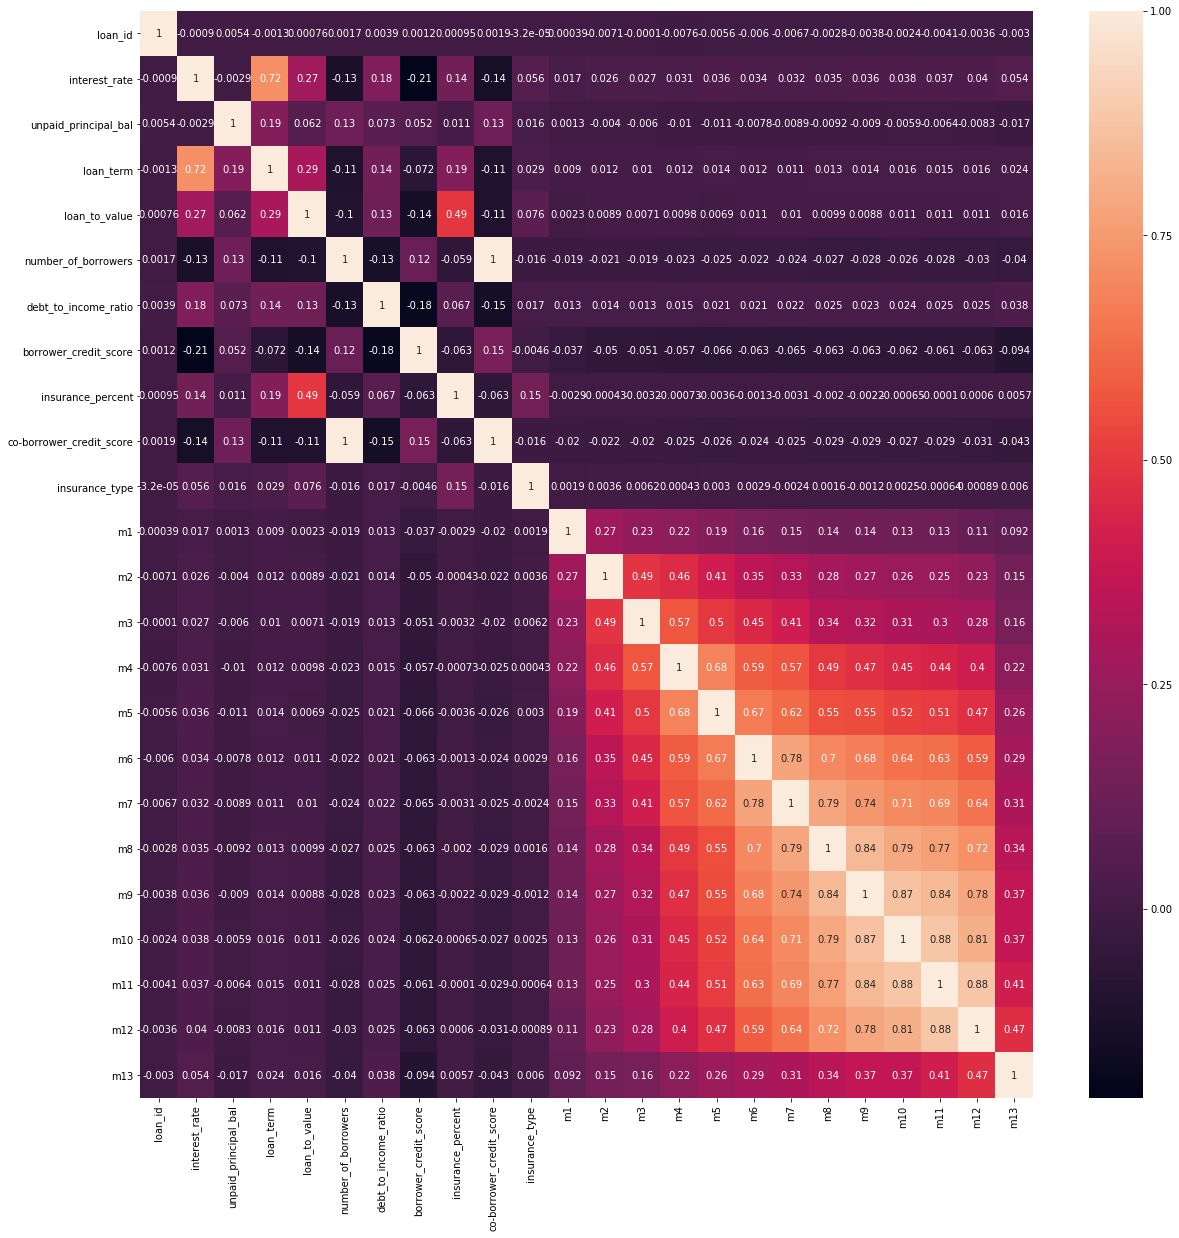

In [286]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

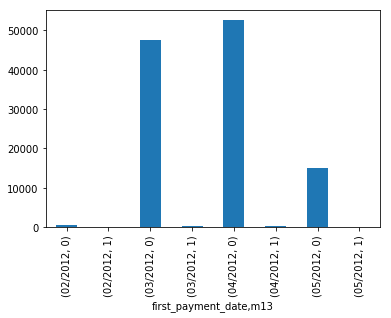

In [287]:
df.groupby(['first_payment_date'])['m13'].value_counts().plot.bar()



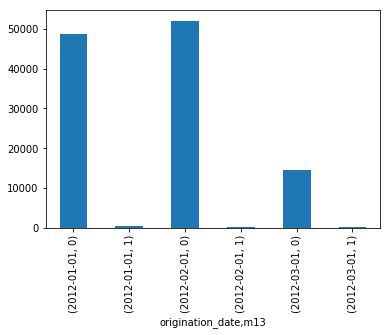

In [288]:
df.groupby(['origination_date'])['m13'].value_counts().plot.bar()

In [289]:
df.groupby(['origination_date'])['m13'].value_counts()

origination_date  m13
2012-01-01        0      48789
                  1        304
2012-02-01        0      52055
                  1        279
2012-03-01        0      14578
                  1         53
Name: m13, dtype: int64

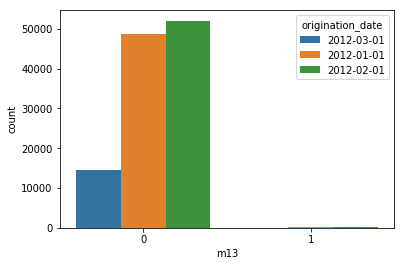

In [290]:
sns.countplot(x='m13',hue='origination_date',data=df)

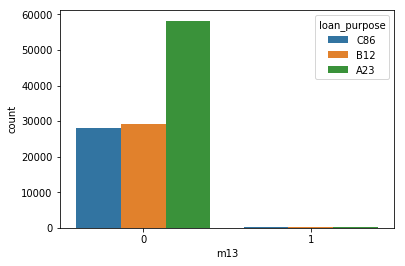

In [291]:
sns.countplot(x='m13',hue='loan_purpose',data=df)

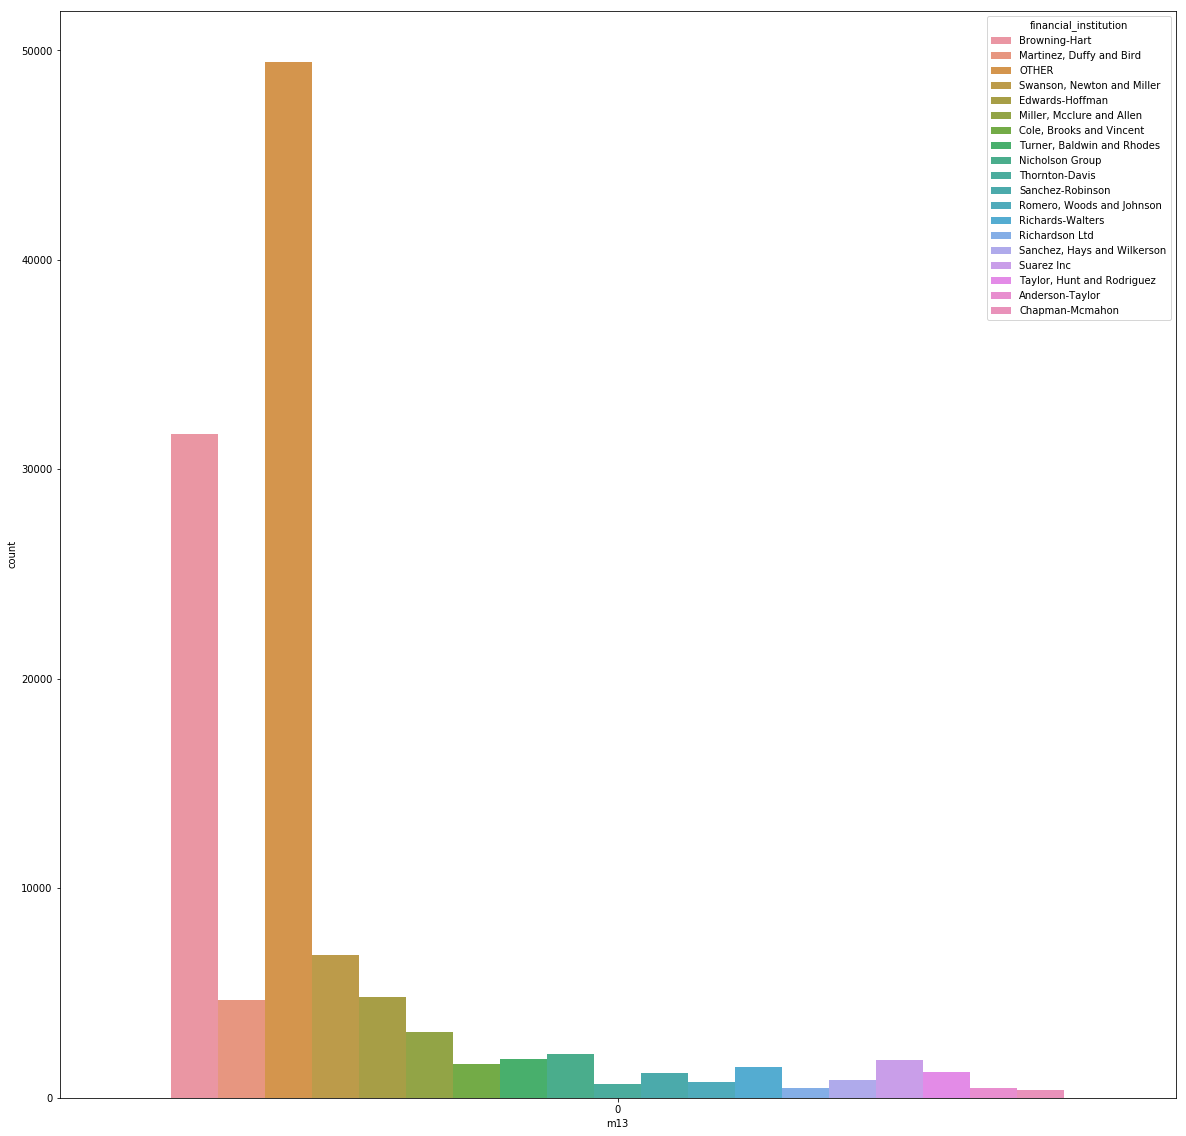

In [292]:
plt.figure(figsize=(20,20))
sns.countplot(x='m13',hue='financial_institution',data=df.loc[df.m13==0,])

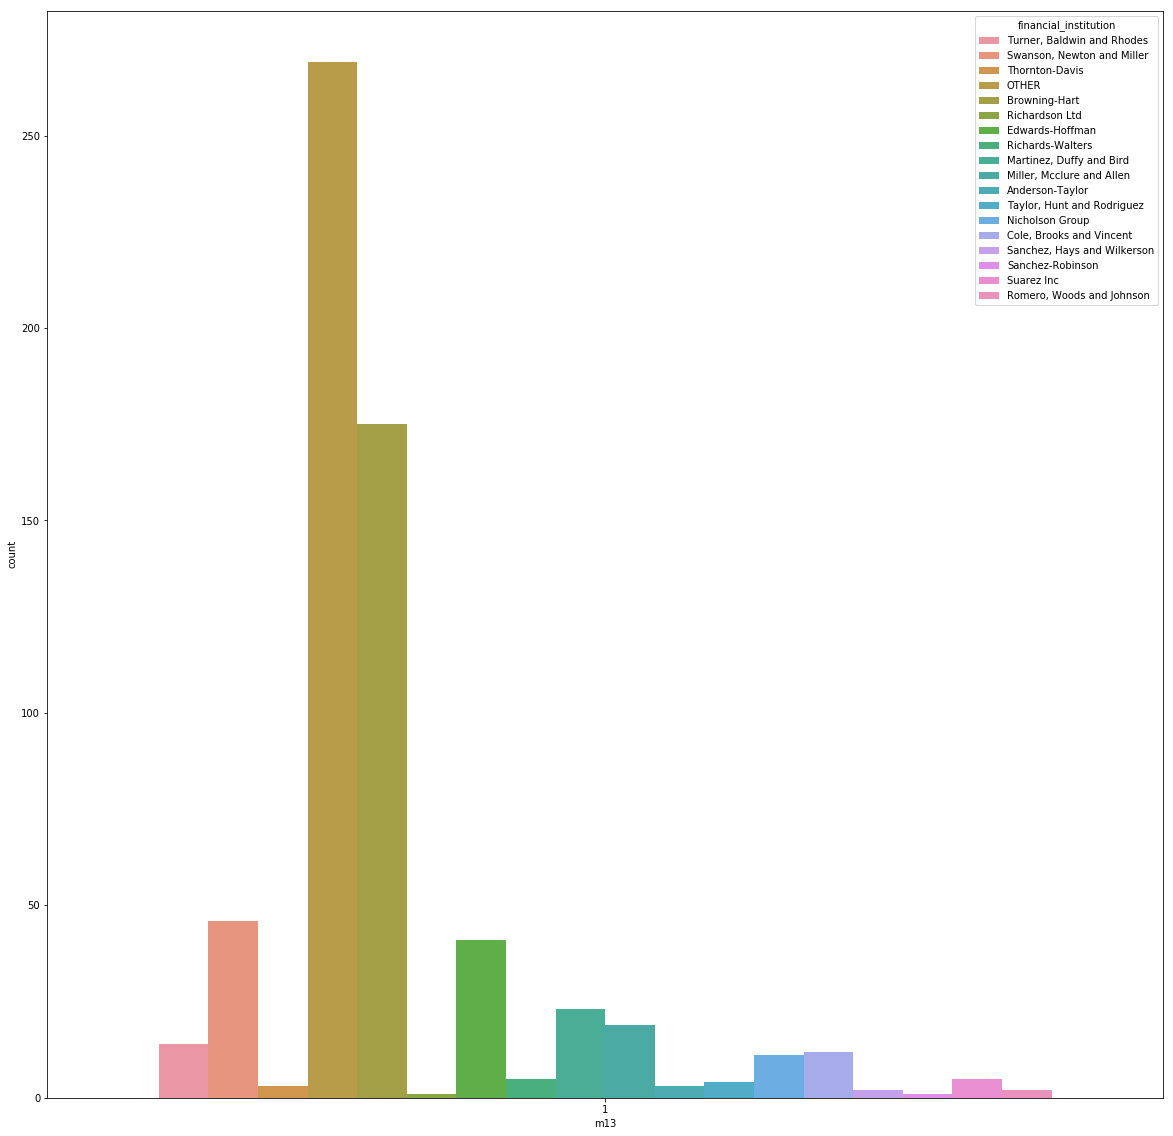

In [293]:
plt.figure(figsize=(20,20))
sns.countplot(x='m13',hue='financial_institution',data=df.loc[df.m13==1,])

In [134]:
df_upsampled.isnull().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
m13                         0
dtype: int64

In [135]:
df_upsampled.m13.unique()

array([1, 0], dtype=int64)

In [76]:
df['first_payment_month']=df.first_payment_date.apply(lambda x:x.split('/')[0])

df['first_payment_month']=df.first_payment_month.astype('int')
df['origination_month']=df.origination_date.apply(lambda x:x.split('-')[1])

df['origination_month']=df.origination_month.astype('int')

df = shuffle(df)
y=df.m13.values
#df.drop(['origination_date','first_payment_date','m13','loan_id'],axis=1,inplace=True)
#df.drop(['origination_date','first_payment_date','source','financial_institution','loan_purpose','m13','loan_id'],axis=1,inplace=True)
df.drop(['origination_date','first_payment_date','m13','loan_id'],axis=1,inplace=True)
  
df=pd.get_dummies(df)
X=df.values
#sc=StandardScaler()
#sc.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


In [300]:
df.columns

Index(['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'first_payment_month', 'origination_month', 'source_X', 'source_Y',
       'source_Z', 'financial_institution_Anderson-Taylor',
       'financial_institution_Browning-Hart',
       'financial_institution_Chapman-Mcmahon',
       'financial_institution_Cole, Brooks and Vincent',
       'financial_institution_Edwards-Hoffman',
       'financial_institution_Martinez, Duffy and Bird',
       'financial_institution_Miller, Mcclure and Allen',
       'financial_institution_Nicholson Group', 'financial_institution_OTHER',
       'financial_institution_Richards-Walters',
       'financial_institution_Richardson Ltd',
       'financial_institution_Romero, Woods and Johnson',
     

In [303]:
def preparedata(df):
    
    df['first_payment_month']=df.first_payment_date.apply(lambda x:x.split('/')[0])

    df['first_payment_month']=df.first_payment_month.astype('object')
    df['origination_month']=df.origination_date.apply(lambda x:x.split('-')[1])

    df['origination_month']=df.origination_month.astype('object')

    df = shuffle(df)
    y=df.m13.values
    #df.drop(['origination_date','first_payment_date','m13','loan_id'],axis=1,inplace=True)
    #df.drop(['origination_date','first_payment_date','source','financial_institution','loan_purpose','m13','loan_id'],axis=1,inplace=True)
    df.drop(['origination_date','first_payment_date','m13','loan_id'],axis=1,inplace=True)
  
    df=pd.get_dummies(df)
    X=df.values
    sc=StandardScaler()
    sc.fit_transform(X)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    return X_train,X_test,y_train,y_test,X,y,df.columns


In [12]:
def lrmodel(X_train,X_test,y_train,y_test):
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    print(" Accuracy Score :",accuracy_score(y_pred,y_test))
    print("F1 Score :",f1_score(y_pred,y_test))
    print("Classification Report : ",classification_report(y_test,y_pred))
   
    return lr


In [13]:
def xgbmodel(X_train,X_test,y_train,y_test):
    xg=xgb.XGBClassifier()
    xg.fit(X_train,y_train)
    y_pred=xg.predict(X_test)
    print(" Accuracy Score :",accuracy_score(y_pred,y_test))
    print("F1 Score :",f1_score(y_pred,y_test))
    print("Classification Report : ",classification_report(y_test,y_pred))
   
    return xg

In [14]:
def naive_bays_model(X_train,X_test,y_train,y_test):
    
    mnb=MultinomialNB()
    mnb.fit(X_train,y_train)

    y_pred=mnb.predict(X_test)
    print(" Accuracy Score :",accuracy_score(y_pred,y_test))
    print("F1 Score :",f1_score(y_pred,y_test))
    print("Classification Report : ",classification_report(y_test,y_pred))
   
    return mnb
    

In [15]:
def lgbmodel(X_train,X_test,y_train,y_test):
    lg=lgb.LGBMClassifier()
    lg.fit(X_train,y_train)
    y_pred=lg.predict(X_test)
    print(" Accuracy Score :",accuracy_score(y_pred,y_test))
    print("F1 Score :",f1_score(y_pred,y_test))
    print("Classification Report : ",classification_report(y_test,y_pred))
   
    return lg

In [16]:
def randomforest_model(X_train,X_test,y_train,y_test):
    rt=RandomForestClassifier()
    rt.fit(X_train,y_train)
    y_pred=rt.predict(X_test)
    print(" Accuracy Score :",accuracy_score(y_pred,y_test))
    print("F1 Score :",f1_score(y_pred,y_test))
    print("Classification Report : ",classification_report(y_test,y_pred))
   
    return rt
    

In [272]:
X_train,X_test,y_train,y_test=preparedata(df_upsampled)


D:\anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [128]:
X_train.shape

(161830, 54)

In [129]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [130]:
X_train.shape

(161830, 54)

In [131]:

model = Sequential()
model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# 2. compile the network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [132]:
with tf.device("/:gpu:0"):
    model.fit(X_train,y_train,epochs=3,batch_size=20,validation_data=(X_test,y_test))

Train on 161830 samples, validate on 69254 samples
Epoch 1/3
161830/161830 [==============================] - 39s 240us/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9988 - val_acc: 0.4983
Epoch 2/3
161830/161830 [==============================] - 38s 233us/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9988 - val_acc: 0.4983
Epoch 3/3
161830/161830 [==============================] - 38s 234us/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9988 - val_acc: 0.4983


In [133]:
dt=pd.read_csv('test.csv')

In [134]:
dt.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,Y,Browning-Hart,3.875,417000,360,01/02/12,Apr-12,75,1,...,0,0,0,0,0,0,0,0,0,0
1,2,X,OTHER,4.500,113000,360,01/02/12,Apr-12,80,2,...,0,0,0,0,0,0,0,0,0,0
2,3,Y,OTHER,4.500,72000,360,01/01/12,Mar-12,75,1,...,0,0,0,0,0,0,0,0,0,0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,01/02/12,Apr-12,41,2,...,0,0,0,0,0,0,0,0,0,0
4,5,X,Browning-Hart,3.250,166000,180,01/02/12,Apr-12,53,2,...,0,0,0,0,0,0,0,0,0,0


In [135]:
month_to_num={"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12}

In [136]:
dt.first_payment_date.apply(lambda x:month_to_num[x.split('-')[0]])

0        4
1        4
2        3
3        4
4        4
5        4
6        4
7        3
8        4
9        4
10       4
11       4
12       4
13       4
14       5
15       3
16       3
17       4
18       3
19       3
20       4
21       4
22       4
23       3
24       4
25       3
26       3
27       4
28       4
29       5
        ..
35836    4
35837    3
35838    4
35839    4
35840    4
35841    3
35842    3
35843    4
35844    4
35845    3
35846    3
35847    4
35848    3
35849    4
35850    3
35851    3
35852    4
35853    4
35854    3
35855    4
35856    3
35857    5
35858    4
35859    3
35860    4
35861    4
35862    3
35863    4
35864    4
35865    4
Name: first_payment_date, Length: 35866, dtype: int64

In [212]:

def buildtest(dt):
    
    dt['first_payment_month']=dt.first_payment_date.apply(lambda x:month_to_num[x.split('-')[0]])

    dt['first_payment_month']=dt.first_payment_month.astype('object')
    dt['origination_month']=dt.origination_date.apply(lambda x:x.split('/')[1])

    dt['origination_month']=dt.origination_month.astype('object')
    l1=dt.loan_id
    #dt.drop(['origination_date','first_payment_date','loan_id'],axis=1,inplace=True)
    #dt.drop(['origination_date','first_payment_date','source','financial_institution','loan_purpose','loan_id'],axis=1,inplace=True)
    dt.drop(['origination_date','first_payment_date','loan_id'],axis=1,inplace=True)
    
    dt=pd.get_dummies(dt)

    Xt=dt.values
    #sc=StandardScaler()
    #sc.fit_transform(Xt)
    return Xt,l1,dt

def writetocsv(ypr,l1,fname):

    tp=pd.DataFrame({'loan_id':l1,'m13':ypr})

    tp.to_csv(fname,index=False)


In [213]:
dt=pd.read_csv('test.csv')
Xt,l1,dt=buildtest(dt)

In [214]:
dt.columns

Index(['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'source_X', 'source_Y', 'source_Z',
       'financial_institution_Anderson-Taylor',
       'financial_institution_Browning-Hart',
       'financial_institution_Chapman-Mcmahon',
       'financial_institution_Cole, Brooks and Vincent',
       'financial_institution_Edwards-Hoffman',
       'financial_institution_Martinez, Duffy and Bird',
       'financial_institution_Miller, Mcclure and Allen',
       'financial_institution_Nicholson Group', 'financial_institution_OTHER',
       'financial_institution_Richards-Walters',
       'financial_institution_Richardson Ltd',
       'financial_institution_Romero, Woods and Johnson',
       'financial_institution_Sanchez, Hays and W

In [215]:
dt.shape

(35866, 54)

In [216]:
df.shape

(116058, 31)

In [217]:

#Xt=sc.transform(Xt)

#Xt = pca.transform(Xt)

In [218]:
Xt.shape

(35866, 54)

In [219]:

ypr=lr.predict(Xt)
writetocsv(ypr,l1,'submission_lr1.csv')


In [220]:
ypr=rt.predict(Xt)
writetocsv(ypr,l1,'submission_rt1.csv')

In [221]:
ypr=xg.predict(Xt)
writetocsv(ypr,l1,'submission_xg1.csv')

In [222]:
ypr=lg.predict(Xt)
writetocsv(ypr,l1,'submission_lg1.csv')

In [223]:
ypr=mnb.predict(Xt)
writetocsv(ypr,l1,'submission_mnb1.csv')

In [148]:
ypr=model.predict_classes(Xt)

In [149]:
ypr=ypr.flatten()

In [150]:
writetocsv(ypr,l1,'submission_nn1.csv')

In [151]:
set(ypr)

{1}